# Dataset Exploration and Analysis

This notebook explores the structure and characteristics of our plant disease datasets.

In [1]:
# Import necessary libraries (run the setup from previous notebook first)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
import cv2
from PIL import Image

# Set paths
PROJECT_ROOT = Path('/Users/debabratapattnayak/web-dev/greencast')
DATASET_PATH = PROJECT_ROOT / 'dataset'
PLANTVILLAGE_PATH = DATASET_PATH / 'plantvillage dataset'
DATA2_PATH = DATASET_PATH / 'data2'

## Dataset Structure Analysis

In [2]:
def analyze_dataset_structure(dataset_path):
    """Analyze the structure of the dataset"""
    structure = {}
    
    for root, dirs, files in os.walk(dataset_path):
        level = root.replace(str(dataset_path), '').count(os.sep)
        indent = ' ' * 2 * level
        folder_name = os.path.basename(root)
        
        if level <= 3:  # Limit depth for readability
            print(f"{indent}{folder_name}/ ({len(files)} files, {len(dirs)} subdirs)")
        
        # Count image files
        image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        if image_files:
            structure[root] = len(image_files)
    
    return structure

print("=== PlantVillage Dataset Structure ===")
plantvillage_structure = analyze_dataset_structure(PLANTVILLAGE_PATH)

print("\n=== Data2 Dataset Structure ===")
data2_structure = analyze_dataset_structure(DATA2_PATH)

=== PlantVillage Dataset Structure ===
plantvillage dataset/ (0 files, 3 subdirs)
  grayscale/ (0 files, 38 subdirs)
    Strawberry___healthy/ (456 files, 0 subdirs)
    Grape___Black_rot/ (1180 files, 0 subdirs)
    Potato___Early_blight/ (1000 files, 0 subdirs)
    Blueberry___healthy/ (1502 files, 0 subdirs)
    Corn_(maize)___healthy/ (1162 files, 0 subdirs)
    Tomato___Target_Spot/ (1404 files, 0 subdirs)
    Peach___healthy/ (360 files, 0 subdirs)
    Potato___Late_blight/ (1000 files, 0 subdirs)
    Tomato___Late_blight/ (1909 files, 0 subdirs)
    Tomato___Tomato_mosaic_virus/ (373 files, 0 subdirs)
    Pepper,_bell___healthy/ (1478 files, 0 subdirs)
    Orange___Haunglongbing_(Citrus_greening)/ (5507 files, 0 subdirs)
    Tomato___Leaf_Mold/ (952 files, 0 subdirs)
    Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/ (1076 files, 0 subdirs)
    Cherry_(including_sour)___Powdery_mildew/ (1052 files, 0 subdirs)
    Apple___Cedar_apple_rust/ (275 files, 0 subdirs)
    Tomato___Bacteri

## Class Distribution Analysis


=== PlantVillage Color Class Distribution ===
Total classes: 38
Total images: 54305
Average images per class: 1429.1
Min images per class: 152
Max images per class: 5507


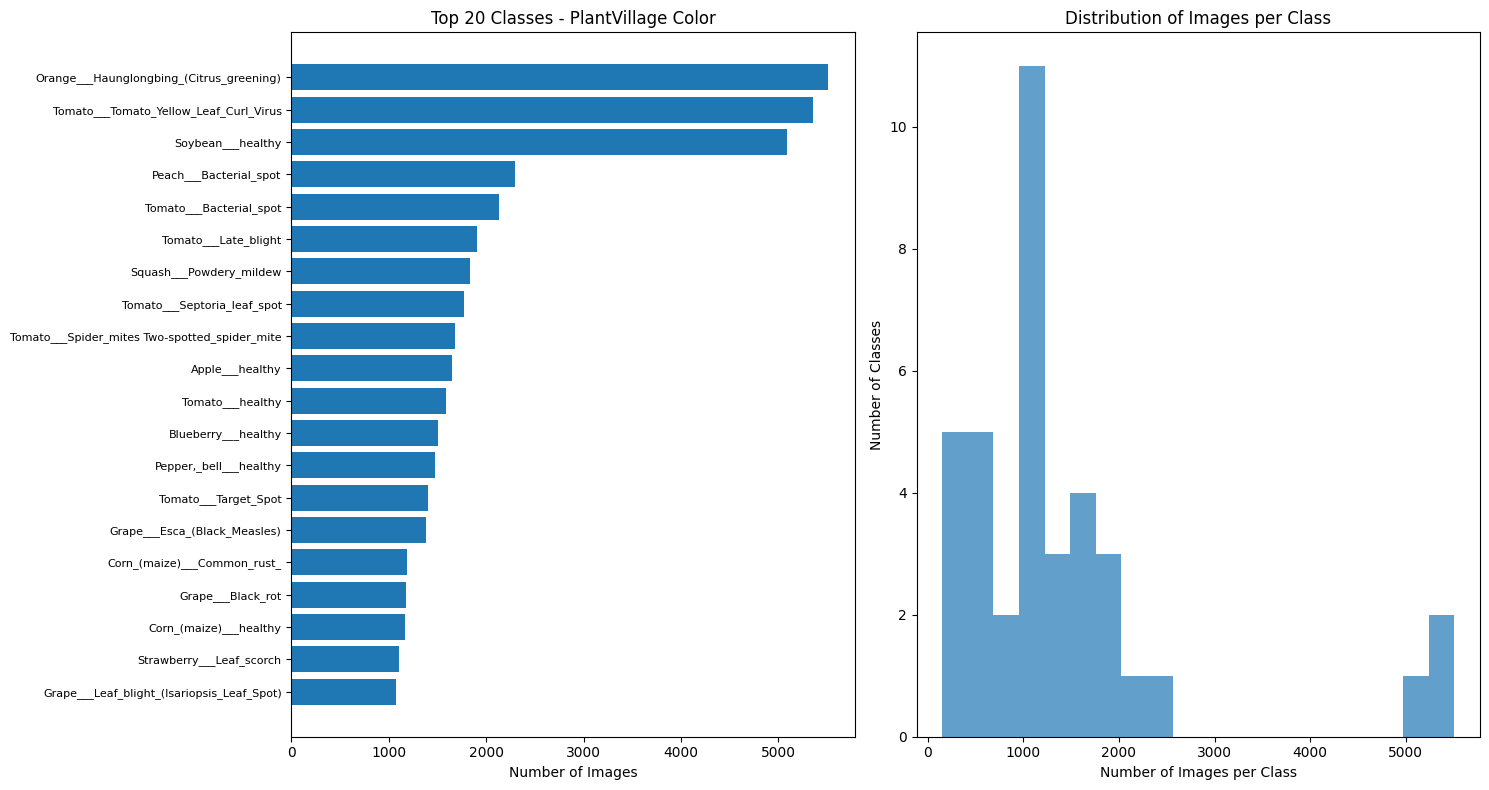


=== Data2 Class Distribution ===
Total classes: 16
Total images: 6578
Average images per class: 411.1
Min images per class: 369
Max images per class: 453


In [3]:
def get_class_distribution(dataset_path, dataset_name):
    """Get class distribution for a dataset"""
    class_counts = {}
    
    for root, dirs, files in os.walk(dataset_path):
        # Count image files in each directory
        image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        
        if image_files and len(image_files) > 10:  # Only consider directories with substantial images
            class_name = os.path.basename(root)
            class_counts[class_name] = len(image_files)
    
    # Create DataFrame
    df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
    df = df.sort_values('Count', ascending=False)
    
    print(f"\n=== {dataset_name} Class Distribution ===")
    print(f"Total classes: {len(df)}")
    print(f"Total images: {df['Count'].sum()}")
    print(f"Average images per class: {df['Count'].mean():.1f}")
    print(f"Min images per class: {df['Count'].min()}")
    print(f"Max images per class: {df['Count'].max()}")
    
    return df

# Analyze PlantVillage color dataset
plantvillage_color_path = PLANTVILLAGE_PATH / 'color'
if plantvillage_color_path.exists():
    pv_color_dist = get_class_distribution(plantvillage_color_path, "PlantVillage Color")
    
    # Plot distribution
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    top_20 = pv_color_dist.head(20)
    plt.barh(range(len(top_20)), top_20['Count'])
    plt.yticks(range(len(top_20)), top_20['Class'], fontsize=8)
    plt.xlabel('Number of Images')
    plt.title('Top 20 Classes - PlantVillage Color')
    plt.gca().invert_yaxis()
    
    # Distribution histogram
    plt.subplot(1, 2, 2)
    plt.hist(pv_color_dist['Count'], bins=20, alpha=0.7)
    plt.xlabel('Number of Images per Class')
    plt.ylabel('Number of Classes')
    plt.title('Distribution of Images per Class')
    
    plt.tight_layout()
    plt.show()

# Analyze Data2 dataset
data2_dist = get_class_distribution(DATA2_PATH, "Data2")

## Image Quality Analysis

Analyzing 100 sample images...

=== Image Properties Statistics ===
       width  height  channels  file_size_kb  aspect_ratio  mean_brightness  \
count  100.0   100.0     100.0    100.000000         100.0       100.000000   
mean   256.0   256.0       3.0     16.044189           1.0       118.806702   
std      0.0     0.0       0.0      4.570752           0.0        18.240000   
min    256.0   256.0       3.0      6.957031           1.0        70.153641   
25%    256.0   256.0       3.0     12.475098           1.0       108.477142   
50%    256.0   256.0       3.0     16.006836           1.0       118.324516   
75%    256.0   256.0       3.0     19.274170           1.0       127.662903   
max    256.0   256.0       3.0     26.253906           1.0       182.486481   

       total_pixels  
count         100.0  
mean        65536.0  
std             0.0  
min         65536.0  
25%         65536.0  
50%         65536.0  
75%         65536.0  
max         65536.0  


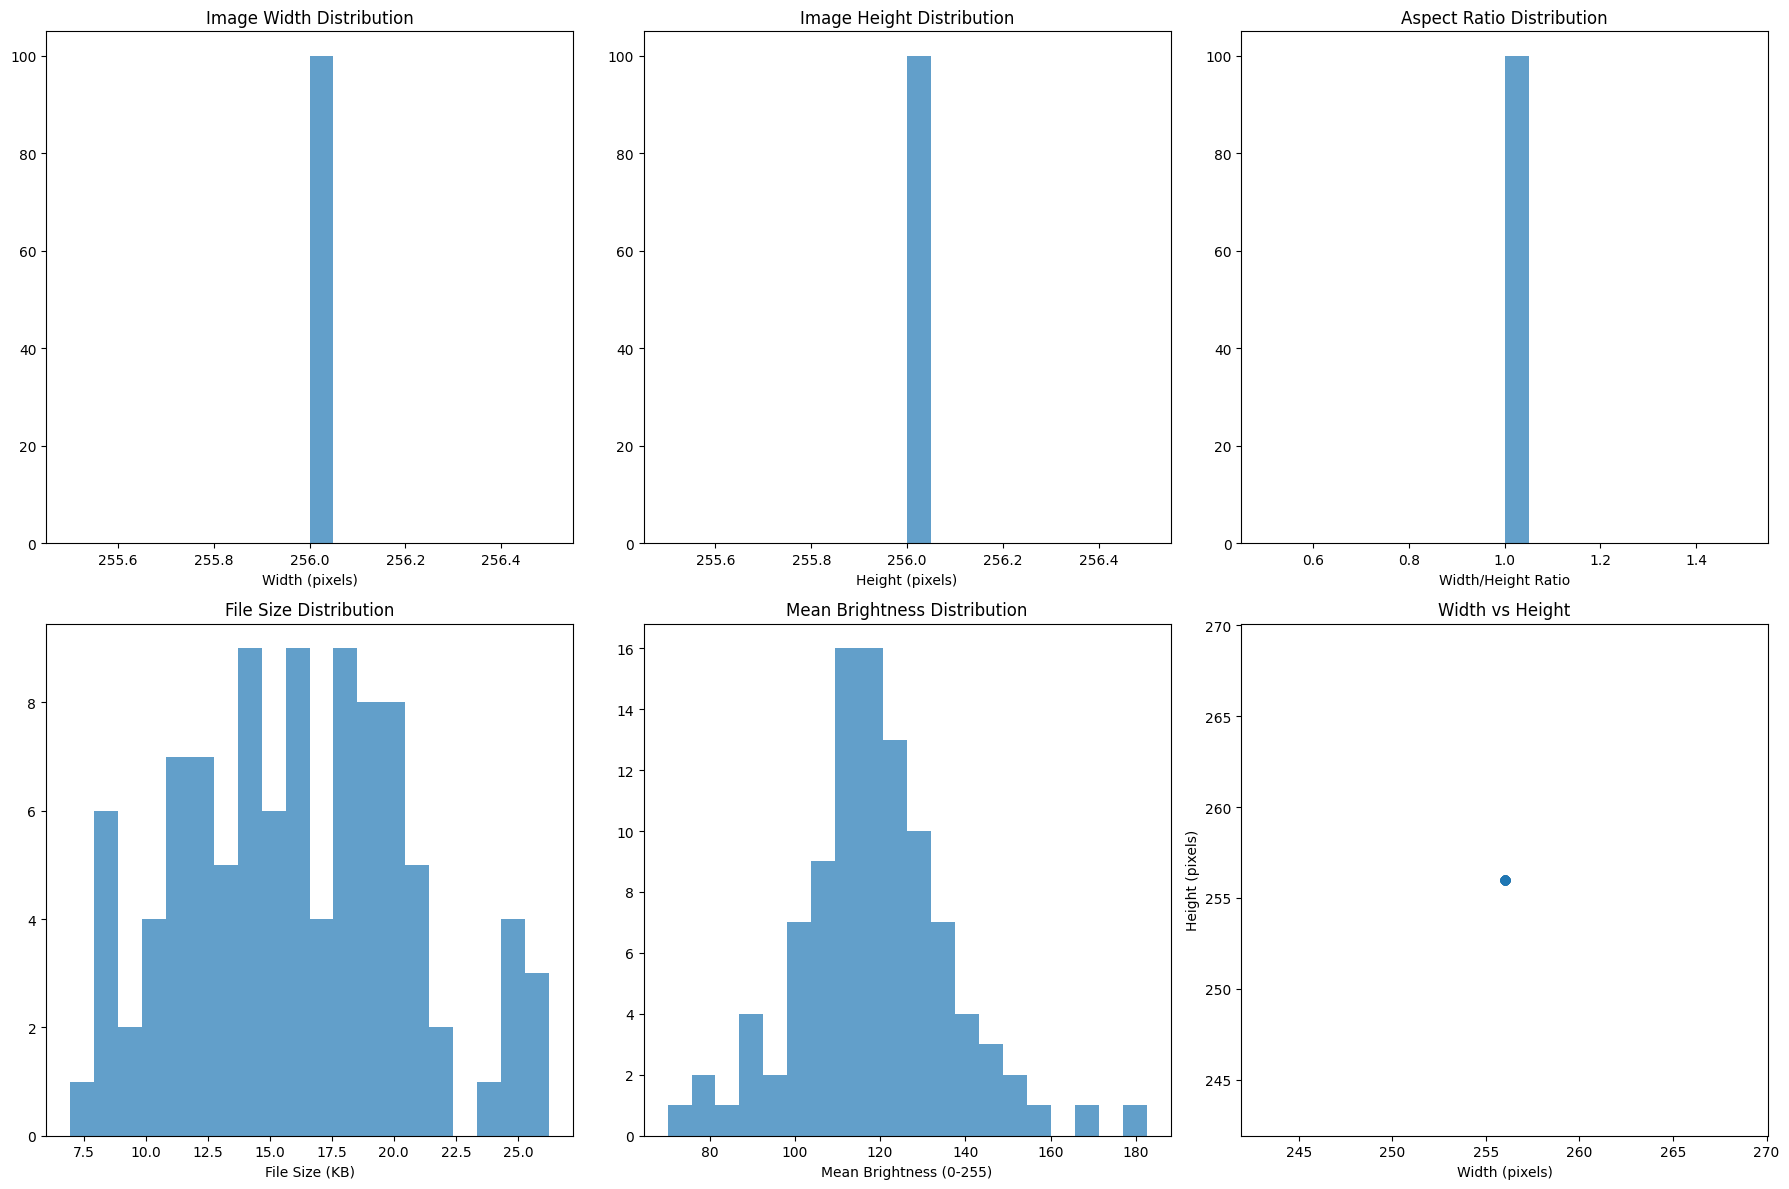

In [4]:
def analyze_image_properties(dataset_path, sample_size=100):
    """Analyze image properties like size, format, quality"""
    image_info = []
    
    # Collect sample images
    all_images = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                all_images.append(os.path.join(root, file))
    
    # Sample random images
    if len(all_images) > sample_size:
        sample_images = np.random.choice(all_images, sample_size, replace=False)
    else:
        sample_images = all_images
    
    print(f"Analyzing {len(sample_images)} sample images...")
    
    for img_path in sample_images:
        try:
            # Load image
            img = cv2.imread(img_path)
            if img is not None:
                height, width, channels = img.shape
                file_size = os.path.getsize(img_path) / 1024  # KB
                
                # Calculate image statistics
                mean_brightness = np.mean(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
                
                image_info.append({
                    'width': width,
                    'height': height,
                    'channels': channels,
                    'file_size_kb': file_size,
                    'aspect_ratio': width / height,
                    'mean_brightness': mean_brightness,
                    'total_pixels': width * height
                })
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    
    # Create DataFrame
    df = pd.DataFrame(image_info)
    
    # Display statistics
    print("\n=== Image Properties Statistics ===")
    print(df.describe())
    
    return df

# Analyze PlantVillage color images
if plantvillage_color_path.exists():
    pv_img_props = analyze_image_properties(plantvillage_color_path)
    
    # Plot image properties
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Width distribution
    axes[0, 0].hist(pv_img_props['width'], bins=20, alpha=0.7)
    axes[0, 0].set_title('Image Width Distribution')
    axes[0, 0].set_xlabel('Width (pixels)')
    
    # Height distribution
    axes[0, 1].hist(pv_img_props['height'], bins=20, alpha=0.7)
    axes[0, 1].set_title('Image Height Distribution')
    axes[0, 1].set_xlabel('Height (pixels)')
    
    # Aspect ratio
    axes[0, 2].hist(pv_img_props['aspect_ratio'], bins=20, alpha=0.7)
    axes[0, 2].set_title('Aspect Ratio Distribution')
    axes[0, 2].set_xlabel('Width/Height Ratio')
    
    # File size
    axes[1, 0].hist(pv_img_props['file_size_kb'], bins=20, alpha=0.7)
    axes[1, 0].set_title('File Size Distribution')
    axes[1, 0].set_xlabel('File Size (KB)')
    
    # Brightness
    axes[1, 1].hist(pv_img_props['mean_brightness'], bins=20, alpha=0.7)
    axes[1, 1].set_title('Mean Brightness Distribution')
    axes[1, 1].set_xlabel('Mean Brightness (0-255)')
    
    # Width vs Height scatter
    axes[1, 2].scatter(pv_img_props['width'], pv_img_props['height'], alpha=0.6)
    axes[1, 2].set_title('Width vs Height')
    axes[1, 2].set_xlabel('Width (pixels)')
    axes[1, 2].set_ylabel('Height (pixels)')
    
    plt.tight_layout()
    plt.show()

## Sample Images Visualization

Sample images from PlantVillage Color dataset:


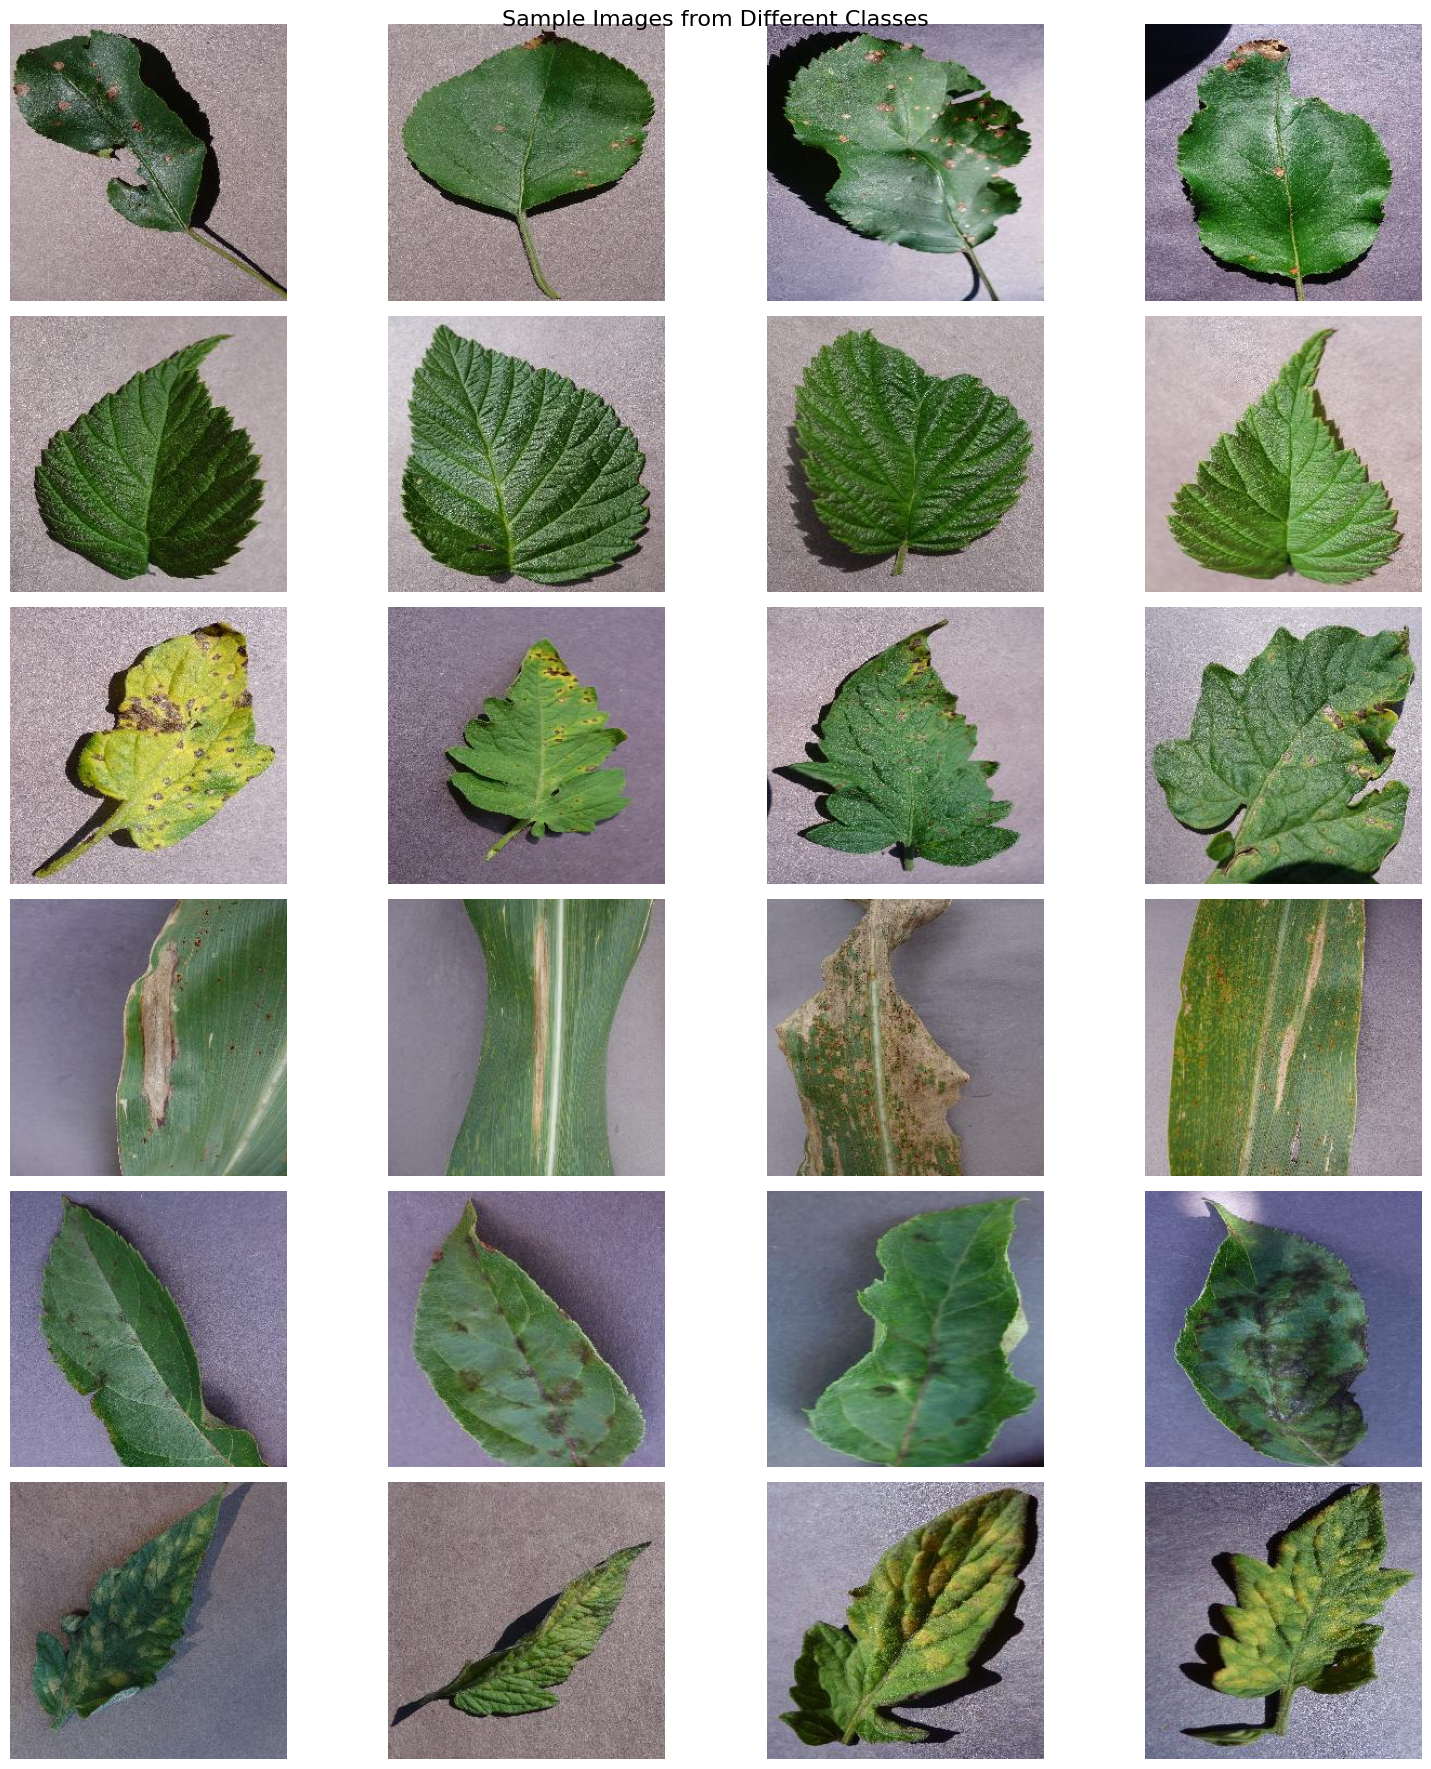

In [5]:
def visualize_sample_images(dataset_path, num_classes=6, images_per_class=4):
    """Visualize sample images from different classes"""
    
    # Get class directories
    class_dirs = []
    for item in os.listdir(dataset_path):
        item_path = os.path.join(dataset_path, item)
        if os.path.isdir(item_path):
            # Check if directory has images
            images = [f for f in os.listdir(item_path) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
            if len(images) >= images_per_class:
                class_dirs.append((item, item_path, images))
    
    # Select random classes
    if len(class_dirs) > num_classes:
        selected_classes = np.random.choice(len(class_dirs), num_classes, replace=False)
        class_dirs = [class_dirs[i] for i in selected_classes]
    
    # Create visualization
    fig, axes = plt.subplots(num_classes, images_per_class, 
                            figsize=(images_per_class * 4, num_classes * 3))
    
    if num_classes == 1:
        axes = axes.reshape(1, -1)
    
    for class_idx, (class_name, class_path, images) in enumerate(class_dirs):
        # Select random images from this class
        selected_images = np.random.choice(images, images_per_class, replace=False)
        
        for img_idx, img_name in enumerate(selected_images):
            img_path = os.path.join(class_path, img_name)
            
            try:
                # Load and display image
                img = cv2.imread(img_path)
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                axes[class_idx, img_idx].imshow(img_rgb)
                axes[class_idx, img_idx].axis('off')
                
                if img_idx == 0:
                    axes[class_idx, img_idx].set_ylabel(class_name, 
                                                       rotation=90, 
                                                       fontsize=10)
                    
            except Exception as e:
                axes[class_idx, img_idx].text(0.5, 0.5, f'Error loading\n{img_name}', 
                                             ha='center', va='center')
                axes[class_idx, img_idx].axis('off')
    
    plt.suptitle('Sample Images from Different Classes', fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize PlantVillage color samples
if plantvillage_color_path.exists():
    print("Sample images from PlantVillage Color dataset:")
    visualize_sample_images(plantvillage_color_path)